In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
from tensorflow.contrib.tensorboard.plugins import projector

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
tf.__version__

'1.6.0'

In [3]:
#!/usr/bin/python3
# -*- coding: utf-8 -*-
from __future__ import division, print_function, unicode_literals
import tensorflow as tf
from time import time
from keras.utils import np_utils#one hot
import os
from skimage import data
from skimage import transform
import skimage
import numpy as np

# Download the dataset


def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory) 
                  if os.path.isdir(os.path.join(data_directory,d))]
    labels=[]
    images=[]
    for d in directories:
        label_directory = os.path.join(data_directory,d)
        file_names = [os.path.join(label_directory,f)
                     for f in os.listdir(label_directory)
                     if f.endswith('.jpg')]
        for f in file_names:
            
            images.append(skimage.data.imread(f))
            labels.append(str(d))
    return images, labels






Using TensorFlow backend.


In [4]:
ROOT_PATH = '/home/tang/targa/BigSize1/'
train_data_directory = os.path.join(ROOT_PATH, "train")
validation_data_directory = os.path.join(ROOT_PATH, "val")
test_data_directory = os.path.join(ROOT_PATH, "test")
train_images,train_labels = load_data(train_data_directory)
test_images,test_labels = load_data(test_data_directory)
validation_images,validation_labels = load_data(validation_data_directory)

In [5]:
#encoding trY teY
from numpy import array
#from numpy import argmax
#from keras.utils import to_categorical
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# define example

#train_labels = np_utils.to_categorical(train_labels,num_classes = None)
#test_labels = np_utils.to_categorical(test_labels,num_classes = None)
trL,teL,valL=array(train_labels),array(test_labels),array(validation_labels)
label_encoder = LabelEncoder()

In [6]:
integer_encoded_trL = label_encoder.fit_transform(trL)
integer_encoded_teL = label_encoder.fit_transform(teL)
integer_encoded_valL = label_encoder.fit_transform(valL)

In [7]:
trainLabels = np_utils.to_categorical(integer_encoded_trL,num_classes = 32)
testLabels = np_utils.to_categorical(integer_encoded_teL,num_classes = 32)
validationLabels = np_utils.to_categorical(integer_encoded_valL,num_classes = 32)

In [8]:
num_sample = 1165
for n in range(33):
    nnnn = num_sample*n
    print(n)
    print(integer_encoded_teL[nnnn])
    print(teL[nnnn])
    print('--------------------')

0
18
J
--------------------
1
18
J
--------------------
2
14
E
--------------------
3
7
7
--------------------
4
10
A
--------------------
5
25
S
--------------------
6
11
B
--------------------
7
20
L
--------------------
8
26
T
--------------------
9
31
Z
--------------------
10
23
P
--------------------
11
19
K
--------------------
12
12
C
--------------------
13
15
F
--------------------
14
22
N
--------------------
15
28
W
--------------------
16
9
9
--------------------
17
30
Y
--------------------
18
1
1
--------------------
19
3
3
--------------------
20
4
4
--------------------
21
24
R
--------------------
22
5
5
--------------------
23
16
G
--------------------
24
27
V
--------------------
25
6
6
--------------------
26
0
0
--------------------
27
13
D
--------------------
28
21
M
--------------------
29
29
X
--------------------
30
8
8
--------------------
31
2
2
--------------------
32
17
H
--------------------


In [9]:
teL[1000]

'J'

In [10]:
testLabels[2000]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [11]:
######图片均衡化

In [12]:
from skimage.transform import resize
train_sized_images = [resize(image,(90,90))for image in train_images]
test_sized_images = [resize(image,(90,90))for image in test_images]   
val_sized_images = [resize(image,(90,90))for image in validation_images]   
    

/usr/local/lib/python3.5/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [13]:
print('resized train images shape:\t\t{}'.format(train_sized_images[0].shape))

print('resized test images shape:\t\t{}'.format(test_sized_images[0].shape))

print('resized val images shape:\t\t{}'.format(val_sized_images[0].shape))

resized train images shape:		(90, 90, 3)
resized test images shape:		(90, 90, 3)
resized val images shape:		(90, 90, 3)


In [14]:
train_sized_images[0].shape

(90, 90, 3)

In [15]:
#train_sized_images[0].shape

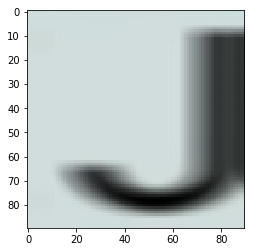

In [16]:
plt.imshow(train_sized_images[5])

In [17]:
########convert rgb images into black and white
#convert images into size of vector
from skimage.color import rgb2gray

trainImages = rgb2gray(np.array(train_sized_images))
testImages = rgb2gray(np.array(test_sized_images))
valImages = rgb2gray(np.array(val_sized_images))


In [18]:
train_flat_images = np.reshape(trainImages,(len(trainImages),90*90))
test_flat_images = np.reshape(testImages,(len(testImages),90*90))
val_flat_images = np.reshape(valImages,(len(valImages),90*90))

In [19]:
valImages.shape

(37312, 90, 90)

In [20]:
train_flat_images[0].shape

(8100,)

In [21]:
print('train images shape:\t\t{}'.format(train_flat_images.shape))

print('test images shape:\t\t{}'.format(test_flat_images.shape))

print('val images shape:\t\t{}'.format(val_flat_images.shape))

train images shape:		(37312, 8100)
test images shape:		(37312, 8100)
val images shape:		(37312, 8100)


In [22]:
integer_encoded_trL[0]

18

In [23]:
validationLabels[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [24]:
print('Size of:')
print('- Training-set:\t\t{}'.format(len(trainLabels)))
print('- Test-set:\t\t{}'.format(len(testLabels)))
print('- Validation-set:\t{}'.format(len(validation_labels)))

Size of:
- Training-set:		37312
- Test-set:		37312
- Validation-set:	37312


In [25]:
def next_batch(num, data, labels):
    '''
    Return a total of `num` random samples and labels. 
    '''
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = [data[ i] for i in idx]
    labels_shuffle = [labels[ i] for i in idx]

    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

In [26]:
def create_sprite_image(images):
    """Returns a sprite image consisting of images passed as argument. Images should be count x width x height"""
    if isinstance(images, list):
        images = np.array(images)
    img_h = images.shape[1]
    img_w = images.shape[2]
    n_plots = int(np.ceil(np.sqrt(images.shape[0])))
    
    
    spriteimage = np.ones((img_h * n_plots ,img_w * n_plots ))
    
    for i in range(n_plots):
        for j in range(n_plots):
            this_filter = i * n_plots + j
            if this_filter < images.shape[0]:
                this_img = images[this_filter]
                spriteimage[i * img_h:(i + 1) * img_h,
                  j * img_w:(j + 1) * img_w] = this_img
    
    return spriteimage

def vector_to_matrix_mnist(mnist_digits):
    """Reshapes normal mnist digit (batch,28*28) to matrix (batch,28,28)"""
    return np.reshape(mnist_digits,(-1,90,90))

def invert_grayscale(mnist_digits):
    """ Makes black white, and white black """
    return 1-mnist_digits

In [27]:
#batch_size = 100
max_steps = 1001
image_num = 500
# n_batch = len(trainLabels)//batch_size
# lr = tf.Variable(0.001,dtype = tf.float32)
LOG_DIR = '/home/DL/tensorflow/targaLogs/twoLayerVis/'
# NAME_TO_VISUALISE_VARIABLE = "targaembedding"
TO_EMBED_COUNT = 500

In [28]:
testLabels[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [29]:
test_flat_images.shape

(37312, 8100)

In [30]:
sess = tf.Session()
embedding = tf.Variable(tf.stack(test_flat_images[:image_num]),trainable=False,name='embedding')

In [31]:
def variable_summaries(var):
    with tf.name_scope('summeries'):
        mean = tf.reduce_mean(var)
        tf.summary.scalar('mean',mean)#平均值
        with tf.name_scope('stddev'):
            stddev = tf.sqrt(tf.reduce_mean(tf.square(var-mean)))
        tf.summary.scalar('stddev',stddev)#标准差
        tf.summary.scalar('max',tf.reduce_max(var))#最大值
        tf.summary.scalar('min',tf.reduce_min(var))#最小值
        tf.summary.histogram('histogram',var)#直方图
with tf.name_scope('input'):
    x = tf.placeholder(tf.float32,[None,8100],name='x-input')
    y = tf.placeholder(tf.float32,[None,32],name='y-input')
#显示图片
with tf.name_scope('input_reshape'):
    image_shaped_input = tf.reshape(x,[-1,90,90,1])#-1代表不确定，２８＊２８
    tf.summary.image('input',image_shaped_input,10)#放十张图片

with tf.name_scope('layer'):
    with tf.name_scope('weights'):
        W = tf.Variable(tf.zeros([8100,32]),name='W')
        variable_summaries(W)
    with tf.name_scope('biases'):
        b = tf.Variable(tf.zeros([32]),name='b')
        variable_summaries(b)
    with tf.name_scope('wx_plus_b'):
        wx_plus_b = tf.matmul(x,W)+b
    with tf.name_scope('softmax'):
        prediction = tf.nn.softmax(wx_plus_b)

with tf.name_scope('loss'):
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels =y,logits = prediction))
    tf.summary.scalar('loss',loss)
with tf.name_scope('train'):
    train_step = tf.train.GradientDescentOptimizer(0.5).minimize(loss)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



In [32]:
sess.run(tf.global_variables_initializer())


with tf.name_scope('accuracy'):
    with tf.name_scope('correct_prediction'):
        #结果存放在一个布尔列表中
        correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(prediction,1))
    with tf.name_scope('accuracy'):
        accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
        tf.summary.scalar('accuracy',accuracy)


In [33]:
def numToStr(number):
    if number == 18:
        string = 'J'
        return string
    if number == 14:
        string = 'E'
        return string
    if number == 7:
        string = '7'
        return string
    if number == 10:
        string = 'A'
        return string
    if number == 25:
        string = 'S'
        return string
    if number == 11:
        string = 'B'
        return string
    if number == 20:
        string = 'L'
        return string
    if number == 26:
        string = 'T'
        return string
    if number == 31:
        string = 'Z'
        return string
    if number == 23:
        string = 'P'
        return string
    if number == 19:
        string = 'K'
        return string
    if number == 12:
        string = 'C'
        return string
    if number == 15:
        string = 'F'
        return string
    if number == 22:
        string = 'N'
        return string
    if number == 28:
        string = 'W'
        return string
    if number == 9:
        string = '9'
        return string
    if number == 30:
        string = 'Y'
        return string
    if number == 1:
        string = '1'
        return string
    if number == 3:
        string = '3'
        return string
    if number == 4:
        string = '4'
        return string
    if number == 24:
        string = 'R'
        return string
    if number == 5:
        string = '5'
        return string
    if number == 16:
        string = 'G'
        return string
    if number == 27:
        string = 'V'
        return string
    if number == 6:
        string = '6'
        return string
    if number == 0:
        string = '0'
        return string
    if number == 13:
        string = 'D'
        return string
    if number == 21:
        string = 'M'
        return string
    if number == 29:
        string = 'X'
        return string
    if number == 8:
        string = '8'
        return string
    if number == 2:
        string = '2'
        return string
    if number == 17:
        string = 'H'
        return string

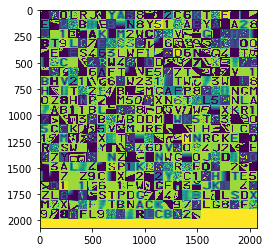

In [34]:

batchX,batchY = next_batch(TO_EMBED_COUNT,train_flat_images,trainLabels)

path_for_targa_sprites =  os.path.join(LOG_DIR,'targa_32k_sprite.png')

to_visualise = batchX
to_visualise = vector_to_matrix_mnist(to_visualise)
#to_visualise = invert_grayscale(to_visualise)

sprite_image = create_sprite_image(to_visualise)

#plt.imsave(path_for_targa_sprites,sprite_image,cmap='gray')
#plt.imshow(sprite_image,cmap='gray')
plt.imsave(path_for_targa_sprites,sprite_image)
plt.imshow(sprite_image)


In [35]:
'''
#产生metadata
#如果存在元文件则删除
########显示PCA的标签写在这里
if tf.gfile.Exists(LOG_DIR + 'metadata.tsv'):
    tf.gfile.DeleteRecursively(LOG_DIR + 'metadata.tsv')
with open(LOG_DIR + 'metadata.tsv','w') as f:
    labels = sess.run(tf.argmax(trainLabels[:],1))
    for i in range(image_num):
        f.write(str(labels[i])+'\n')
'''

"\n#产生metadata\n#如果存在元文件则删除\n########显示PCA的标签写在这里\nif tf.gfile.Exists(LOG_DIR + 'metadata.tsv'):\n    tf.gfile.DeleteRecursively(LOG_DIR + 'metadata.tsv')\nwith open(LOG_DIR + 'metadata.tsv','w') as f:\n    labels = sess.run(tf.argmax(trainLabels[:],1))\n    for i in range(image_num):\n        f.write(str(labels[i])+'\n')\n"

In [36]:
batchY[3]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [37]:
num_sample=1165
ppp=sess.run(tf.argmax(batchY[:],1))
transfercode=[numToStr(p) for p in ppp]

In [38]:
ppp[12]

12

In [39]:
transfercode

['V',
 'X',
 '0',
 'L',
 'R',
 'J',
 'V',
 'Y',
 'A',
 '3',
 '8',
 'C',
 'C',
 '2',
 'C',
 '6',
 'K',
 'T',
 'C',
 'E',
 'N',
 'N',
 'G',
 'E',
 '1',
 'W',
 'Y',
 'B',
 'B',
 'E',
 'B',
 'L',
 'N',
 '8',
 'Y',
 '5',
 '1',
 'F',
 'A',
 'E',
 'Y',
 'A',
 'G',
 'A',
 '2',
 '8',
 'J',
 'J',
 '1',
 'W',
 'B',
 'A',
 'K',
 'C',
 'M',
 '2',
 'W',
 'C',
 'B',
 'A',
 'V',
 '1',
 'W',
 'G',
 'A',
 '2',
 'H',
 '4',
 'C',
 'B',
 'T',
 '9',
 'L',
 'G',
 '7',
 'E',
 'H',
 'C',
 '3',
 'G',
 '7',
 '4',
 '6',
 '8',
 '8',
 '9',
 '0',
 '5',
 'G',
 'T',
 '0',
 '0',
 'X',
 'E',
 'K',
 'E',
 'S',
 '4',
 '6',
 '3',
 'L',
 'W',
 'F',
 '1',
 'N',
 'H',
 'D',
 '6',
 'N',
 '8',
 'G',
 '4',
 'N',
 'T',
 'B',
 'L',
 '6',
 'C',
 'N',
 '8',
 '4',
 'R',
 'W',
 '4',
 '8',
 'Z',
 'D',
 'D',
 'R',
 '5',
 'K',
 '7',
 'L',
 'K',
 'W',
 'T',
 'Z',
 'G',
 '2',
 'S',
 'C',
 'W',
 'D',
 '6',
 'A',
 'F',
 'T',
 '7',
 'V',
 'E',
 '5',
 '2',
 '7',
 'T',
 'F',
 '3',
 'Z',
 '8',
 'V',
 'C',
 '1',
 'B',
 'H',
 'V',
 '2',
 '1',
 '1'

In [40]:
'''with open(LOG_DIR+'metadata.tsv','w') as f:
    f.write("Index\tLabel\n")
    for index,label in enumerate(transfercode):
        f.write("%s\t%s\n" % (index,label))'''
with open(LOG_DIR+'metadata.tsv','w') as f:
    #f.write('Label\n')
    for label in transfercode:
        f.write(str(label)+'\n')
        
    





In [41]:
merged = tf.summary.merge_all()


In [42]:
projector_writer = tf.summary.FileWriter(LOG_DIR,sess.graph)
saver = tf.train.Saver()
config = projector.ProjectorConfig()
embed = config.embeddings.add()

embed.tensor_name = embedding.name

embed.metadata_path = LOG_DIR + 'metadata.tsv'

######embedding copy
#just run one time

In [43]:


















###########

embed.sprite.image_path = LOG_DIR + 'targa_32k_sprite.png'

embed.sprite.single_image_dim.extend([90,90])

projector.visualize_embeddings(projector_writer,config)

for i in range(max_steps):
    batch_xs,batch_ys = next_batch(image_num,train_flat_images,trainLabels)
    
    run_options = tf.RunOptions(trace_level = tf.RunOptions.FULL_TRACE)
    run_metadata = tf.RunMetadata()
    summary,_ =sess.run([merged,train_step],feed_dict ={x:batch_xs,y:batch_ys},options=run_options,run_metadata=run_metadata)
    projector_writer.add_run_metadata(run_metadata,'step%03d'%i)
    projector_writer.add_summary(summary,i)
    if i%100==0:
        acc = sess.run(accuracy,feed_dict={x:test_flat_images,y:testLabels})
        print('Iter'+str(i) + ',testing accuracy='+str(acc))
saver.save(sess,LOG_DIR+'a_model.ckpt',global_step=max_steps)
projector_writer.close()
sess.close()



Iter0,testing accuracy=0.07346162
Iter100,testing accuracy=0.13470197
Iter200,testing accuracy=0.23590265
Iter300,testing accuracy=0.25651264
Iter400,testing accuracy=0.2578527
Iter500,testing accuracy=0.26152444
Iter600,testing accuracy=0.26235527
Iter700,testing accuracy=0.26449937
Iter800,testing accuracy=0.26693824
Iter900,testing accuracy=0.2661074
Iter1000,testing accuracy=0.26784948
